In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

taxi_data = pd.read_csv('../data/trip.csv')

In [16]:
taxi_data

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.00
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.00
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.00
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.00
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.00
...,...,...,...,...,...,...,...,...,...
22696,Austin Johnson,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,Cash,3,0.61,4.0,0.00,0.00
22697,Monique Williams,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,Cash,1,16.71,52.0,14.64,5.76
22698,Drew Graves,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,Debit Card,1,0.42,4.5,0.00,0.00
22699,Jonathan Copeland,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,Debit Card,1,2.36,10.5,1.70,0.00


In [17]:
# 데이터 유형 파악하기
taxi_data.info()
# fare_amount에만 null 값 존재

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22701 entries, 0 to 22700
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passenger_name         22701 non-null  object 
 1   tpep_pickup_datetime   22701 non-null  object 
 2   tpep_dropoff_datetime  22701 non-null  object 
 3   payment_method         22701 non-null  object 
 4   passenger_count        22701 non-null  int64  
 5   trip_distance          22701 non-null  float64
 6   fare_amount            22698 non-null  float64
 7   tip_amount             22701 non-null  float64
 8   tolls_amount           22701 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.6+ MB


In [26]:
taxi_data.describe()
# fare_amount 의 min값이 음수 _ 이상치일듯

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,22700.000000,22700.000000,22700.000000,22700.000000,22700.000000
mean,1.642070,2.913519,13.023170,1.835826,0.312528
std,1.284891,3.653060,13.239433,2.800573,1.399183
min,0.000000,0.000000,-120.000000,0.000000,0.000000
25%,1.000000,0.990000,6.500000,0.000000,0.000000
50%,1.000000,1.610000,9.500000,1.350000,0.000000
75%,2.000000,3.062500,14.500000,2.450000,0.000000
max,6.000000,33.960000,999.990000,200.000000,19.100000


In [18]:
#[ STEP 1_1. 결측치 판단 및 처리]
#결측치의 합
taxi_data.isna().sum()

passenger_name           0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
payment_method           0
passenger_count          0
trip_distance            0
fare_amount              3
tip_amount               0
tolls_amount             0
dtype: int64

In [19]:
taxi_data[taxi_data['fare_amount'].isna()]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
52,Benjamin Johnson,04/04/2017 4:22:03 PM,04/04/2017 4:35:30 PM,Cash,1,2.20,NaN,0.0,0.00
189,Maria Ibarra,08/21/2017 12:40:25 PM,08/21/2017 1:12:31 PM,Debit Card,3,15.20,NaN,5.0,0.00
244,Tina Avila,08/09/2017 8:32:09 AM,08/09/2017 9:31:11 AM,Cash,1,15.89,NaN,10.0,5.76


In [20]:
taxi_data['fare_amount'].isna().median()
# 결측치의 비율이 크지 않다고 판단됨 -> median 값으로 채워넣기

0.0

In [21]:
taxi_data['fare_amount'] = taxi_data['fare_amount'].fillna(taxi_data['fare_amount'].median())

In [22]:
taxi_data[taxi_data['fare_amount'].isna()]
# 결측치 처리 완료!

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount


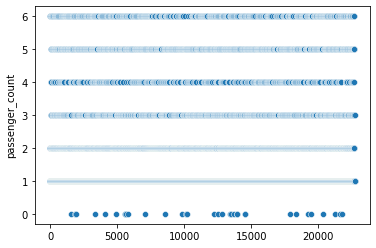

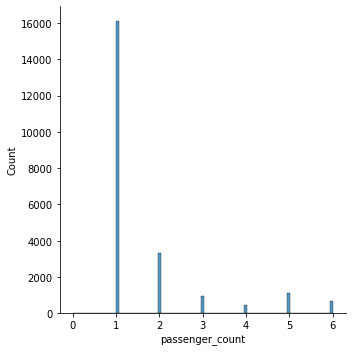

In [38]:
#[ STEP 1_2. 이상치 판단 및 처리]
# - 산점도 그려보기 -
# 1. passenger_count의 분포
sns.scatterplot(x=taxi_data.index, y = taxi_data['passenger_count'] )


<AxesSubplot:ylabel='passenger_count'>

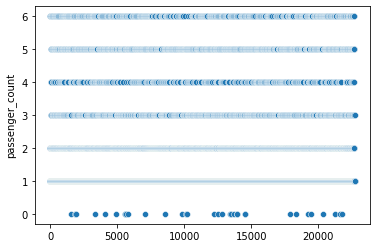

In [24]:
#1.1 이상치 제거 전, passenger_count의 median 값 고려해보기
taxi_data['passenger_count'].median()

#1.1.1 median값과 매우 동떨어져 있으니, 분석의 편의를 위해 이상치 제거
taxi_data = taxi_data[taxi_data['passenger_count'] < 35]

#1.1.2 잘 처리됐는지 확인해보기
sns.scatterplot(x=taxi_data.index, y = taxi_data['passenger_count'] )
# 처리 완료!


<AxesSubplot:ylabel='trip_distance'>

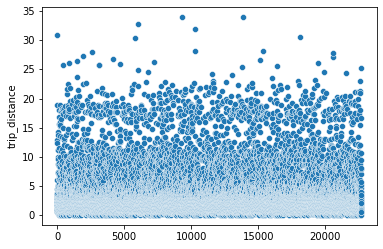

In [25]:
#-산점도 그려보기-
# 2. trip_distance 의 분포
sns.scatterplot(x=taxi_data.index, y = taxi_data['trip_distance'] )

In [27]:
#2.1 trip_distance가 0인 데이터 살펴보기
taxi_data[taxi_data['trip_distance'] == 0]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
129,Linda Kaufman,06/22/2017 8:05:33 AM,06/22/2017 8:05:40 AM,Debit Card,1,0.0,20.0,0.00,0.0
248,Erik Perez,09/18/2017 8:50:53 PM,09/18/2017 8:51:03 PM,Cash,1,0.0,2.5,0.00,0.0
293,Deborah Sanford,10/04/2017 7:46:24 PM,10/04/2017 7:46:50 PM,Cash,1,0.0,2.5,0.00,0.0
321,Ryan Hughes,02/22/2017 4:01:44 AM,02/22/2017 4:01:53 AM,Cash,1,0.0,2.5,0.00,0.0
426,David Parker,01/14/2017 7:00:26 AM,01/14/2017 7:00:53 AM,Cash,1,0.0,2.5,6.70,0.0
...,...,...,...,...,...,...,...,...,...
22192,Angela French,10/16/2017 8:34:07 AM,10/16/2017 8:34:10 AM,Credit Card,1,0.0,2.5,0.00,0.0
22327,Kelsey Rogers,07/21/2017 11:30:29 PM,07/21/2017 11:31:12 PM,Debit Card,1,0.0,16.8,3.42,0.0
22385,Joseph Castillo,01/07/2017 4:48:42 AM,01/07/2017 4:51:03 AM,Cash,1,0.0,10.0,0.00,0.0
22568,Christine Edwards,03/07/2017 2:24:47 AM,03/07/2017 2:24:50 AM,Credit Card,1,0.0,0.0,0.00,0.0


In [16]:
#2.1.1 trip_distance가 0인 데이터의 비율
148/22701

0.006519536584291441

In [29]:
#2.1.2 거리가 0인데 돈을 지불했을리 없으니, 이상치로 판단됨
taxi_data = taxi_data.drop(taxi_data[taxi_data['trip_distance'] == 0].index)

In [30]:
taxi_data[taxi_data['trip_distance'] == 0]
# 이상치 처리 완료!

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount


<AxesSubplot:ylabel='fare_amount'>

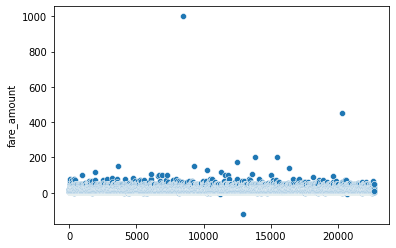

In [28]:
# - 산점도 그려보기 -
# 3. fare_amount 의 분포
sns.scatterplot(x=taxi_data.index, y = taxi_data['fare_amount'] )

In [ ]:
# 위에서 describe()를 통해 fare_amount가 음수인 데이터가 있음을 확인하였음

In [29]:
#이상치인지 판단하기 위해 살펴보기
taxi_data[taxi_data['fare_amount'] < 0]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
316,Tiffany Johnson,12/13/2017 2:02:39 AM,12/13/2017 2:03:08 AM,Cash,6,0.12,-2.5,0.0,0.0
1648,Debbie Holmes,07/05/2017 11:02:23 AM,07/05/2017 11:03:00 AM,Credit Card,1,0.04,-2.5,0.0,0.0
4425,Bobby Wilson,11/16/2017 8:13:30 PM,11/16/2017 8:14:50 PM,Cash,2,0.06,-3.0,0.0,0.0
5450,Alejandro Williams,04/06/2017 12:50:26 PM,04/06/2017 12:52:39 PM,Debit Card,1,0.25,-3.5,0.0,0.0
5760,Samuel Cooper,01/03/2017 8:15:23 PM,01/03/2017 8:15:39 PM,Debit Card,1,0.02,-2.5,0.0,0.0
8206,Stephanie Summers,10/28/2017 8:39:36 PM,10/28/2017 8:41:59 PM,Credit Card,1,0.41,-3.5,0.0,0.0
10283,Donna Larson,06/05/2017 5:34:25 PM,06/05/2017 5:36:29 PM,Credit Card,2,0.00,-2.5,0.0,0.0
11206,Austin Fields,07/09/2017 7:20:59 AM,07/09/2017 7:23:50 AM,Debit Card,1,0.64,-4.5,0.0,0.0
12946,Patrick Herring,04/08/2017 12:00:16 AM,04/08/2017 11:15:57 PM,Cash,1,0.17,-120.0,0.0,0.0
14716,Stefanie Warner,12/24/2017 10:37:58 PM,12/24/2017 10:41:08 PM,Debit Card,5,0.40,-4.0,0.0,0.0


In [30]:
# fare_amount가 음수인 데이터 삭제
taxi_data = taxi_data.drop(taxi_data[taxi_data['fare_amount'] < 0].index)

<AxesSubplot:xlabel='trip_distance', ylabel='fare_amount'>

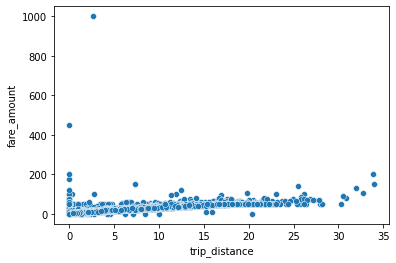

In [31]:
#3.1 이상치 제거 전 판단하기
# 3.1.1 fare_amount 와  trip_distance 간의 상관관계 파악하기
sns.scatterplot(x=taxi_data['trip_distance'],y=taxi_data['fare_amount'])
# => trip_distance값이 커서, 즉, 거리가 멀어서 fare_amount 가 클 것이라 예상했지만 아니었음!


<AxesSubplot:ylabel='fare_amount'>

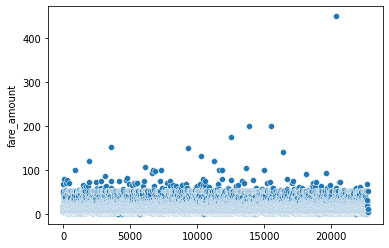

In [32]:
# => 이상치라고 판단되어 제거하기로 함
taxi_data = taxi_data[taxi_data['fare_amount'] < 800]
# 잘 처리됐는지 확인해보기
sns.scatterplot(x=taxi_data.index, y = taxi_data['fare_amount'] )

<AxesSubplot:ylabel='tip_amount'>

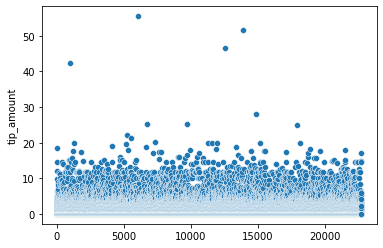

In [34]:
#- 산점도 그려보기 -
# 4. tip_amount 의 분포
sns.scatterplot(x=taxi_data.index, y = taxi_data['tip_amount'] )

<AxesSubplot:xlabel='trip_distance', ylabel='tip_amount'>

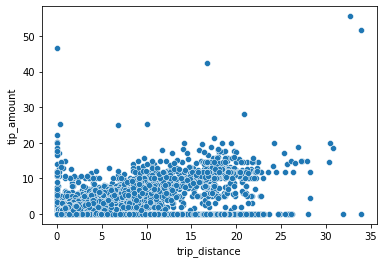

In [35]:
#4.1 이상치 제거 전, 데이터 파악하기
sns.scatterplot(x=taxi_data['trip_distance'],y=taxi_data['tip_amount'])
# => 거리(trip_distance)가 멀어서, tip_amount가 클 줄 알았는데 거리와 상관없음

<AxesSubplot:ylabel='tolls_amount'>

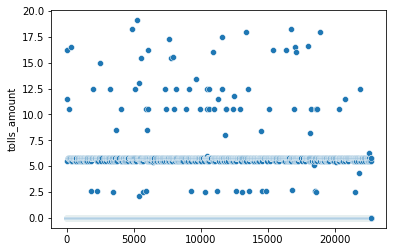

In [37]:
#- 산점도 그려보기 -
# 5.tolls_amount 의 분포
sns.scatterplot(x=taxi_data.index, y = taxi_data['tolls_amount'] )

<AxesSubplot:xlabel='trip_distance', ylabel='fare_amount'>

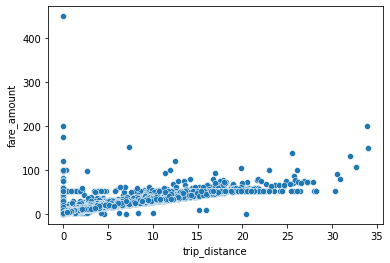

In [39]:
#[ STEP 2_1]
# 택시의 주행 거리와 요금의 상관 관계 분석하기
sns.scatterplot(x=taxi_data['trip_distance'], y=taxi_data['fare_amount'])
#대체적으로 주행거리가 증가함에 따라 요금도 증가함을 살펴볼 수 있음 !


In [40]:
#[STEP 2 _ 2]
#Credit Card와 Debit Card를 구분없이 "Card"라는 이름으로 만들기
taxi_data['payment_method'].unique()

array(['Debit Card', 'Cash', 'Credit Card'], dtype=object)

In [47]:
taxi_data['payment_method'].replace({'Debit Card':'Card','Credit Card':'Card'},inplace=True)

In [48]:
taxi_data['payment_method'].unique()

array(['Card', 'Cash'], dtype=object)